In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [ ]:
# !pip install pandas_datareader

In [ ]:
ticker = 'UL'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2021-04-01')['Adj Close']
data.head()

,UL
Date,
2021-04-01,53.879726
2021-04-05,54.304127
2021-04-06,54.477741
2021-04-07,54.680298
2021-04-08,54.998600


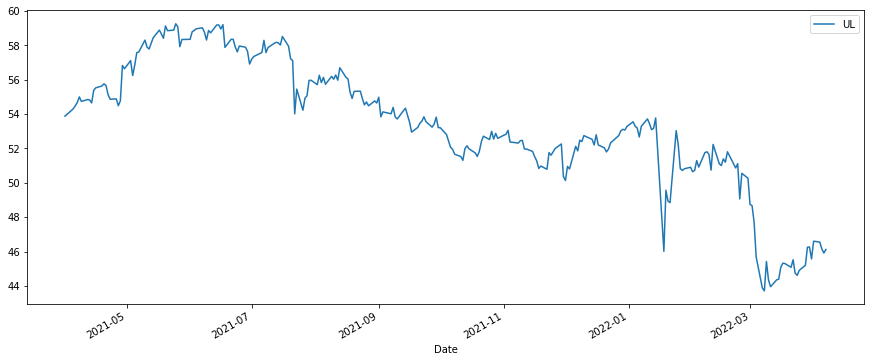

In [ ]:
data.plot(figsize=(15,6))

In [ ]:
stock_returns = np.log(1 + data.pct_change())

stock_returns.tail()

,UL
Date,
2022-04-01,0.022351
2022-04-04,-0.001074
2022-04-05,-0.008413
2022-04-06,-0.005431
2022-04-07,0.004564


Text(0, 0.5, 'Frequency')

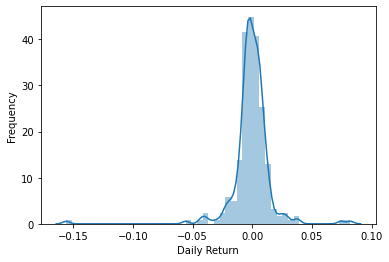

In [ ]:
sns.distplot(stock_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

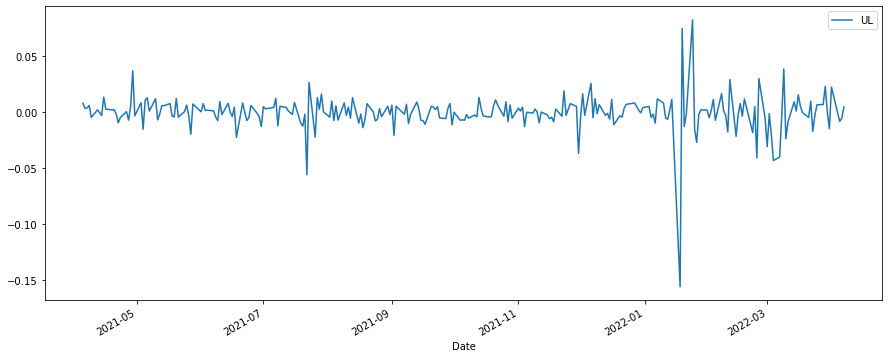

In [ ]:
stock_returns.plot(figsize=(15,6))

In [ ]:
u = stock_returns.mean()
var = stock_returns.var()

In [ ]:
drift = u - (0.5*var)
drift

UL   -0.000742
dtype: float64

In [ ]:
stddev = stock_returns.std()
stddev

UL    0.016559
dtype: float64

In [ ]:
type(drift)

pandas.core.series.Series

In [ ]:
type(stddev)

pandas.core.series.Series

In [ ]:
np.array(drift)

array([-0.00074219])

In [ ]:
drift.values

array([-0.00074219])

In [ ]:
stddev.values

array([0.0165594])

In [ ]:
x = np.random.rand(10,2)
x

array([[0.19209416, 0.80923986],
       [0.3006435 , 0.82615436],
       [0.49227993, 0.27799437],
       [0.42422563, 0.63296798],
       [0.86880768, 0.22938762],
       [0.07874761, 0.48639032],
       [0.80446329, 0.05999185],
       [0.39735744, 0.75616784],
       [0.84991605, 0.06625161],
       [0.21022236, 0.6420266 ]])

In [ ]:
norm.ppf(x)

array([[-0.87020512,  0.87509855],
       [-0.52255063,  0.93907688],
       [-0.01935256, -0.58881001],
       [-0.19109487,  0.33972445],
       [ 1.12077269, -0.74086509],
       [-1.41354609, -0.03412103],
       [ 0.85767232, -1.55484202],
       [-0.26019302,  0.69402851],
       [ 1.03607338, -1.50430359],
       [-0.80564996,  0.36388111]])

In [ ]:
stdev = stock_returns.std()
days = 30
iterations = 100
#Create random value with a given shape in the range from 0 to 1 - np.random.rand(10,2)
Z = norm.ppf(np.random.rand(days, iterations)) #days, trials

In [ ]:
get_daily_returns = np.exp(drift.values + stdev.values * Z)

In [ ]:
get_daily_returns

array([[0.99663191, 1.01159298, 0.98741574, ..., 1.01118261, 1.01047541,
        0.99965417],
       [0.97708849, 1.01523498, 1.00476286, ..., 0.986235  , 1.01245192,
        0.98378879],
       [1.02037308, 0.9759734 , 0.98689601, ..., 1.01124405, 1.00548951,
        0.99352854],
       ...,
       [0.98646977, 0.97457284, 0.9794747 , ..., 1.03044578, 1.01814954,
        0.9818861 ],
       [1.03658603, 0.977843  , 0.99128282, ..., 1.01354523, 1.00929271,
        0.9958099 ],
       [1.0165909 , 1.01592563, 1.02056152, ..., 1.02285872, 0.97978532,
        0.99985029]])

In [ ]:
S0 = data.iloc[-1]
S0

UL    46.119999
Name: 2022-04-07 00:00:00, dtype: float64

In [ ]:
price_paths = np.zeros_like(get_daily_returns)

In [ ]:
price_paths.shape

(30, 100)

In [ ]:
price_paths

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
price_paths[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
price_paths[0] = S0
price_paths

array([[46.11999893, 46.11999893, 46.11999893, ..., 46.11999893,
        46.11999893, 46.11999893],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*get_daily_returns[t]

In [ ]:
price_paths

array([[46.11999893, 46.11999893, 46.11999893, ..., 46.11999893,
        46.11999893, 46.11999893],
       [45.06331994, 46.82263609, 46.33966196, ..., 45.48515723,
        46.69428167, 45.37233814],
       [45.98139872, 45.69764719, 45.73242769, ..., 45.99659457,
        46.95061031, 45.07871298],
       ...,
       [48.57524102, 39.00700261, 42.31197834, ..., 41.79932753,
        40.37146963, 45.95970595],
       [50.35241636, 38.14272459, 41.94313707, ..., 42.36550915,
        40.74663006, 45.76713003],
       [51.18780806, 38.75017149, 42.80555166, ..., 43.33393048,
        39.92295014, 45.76027836]])

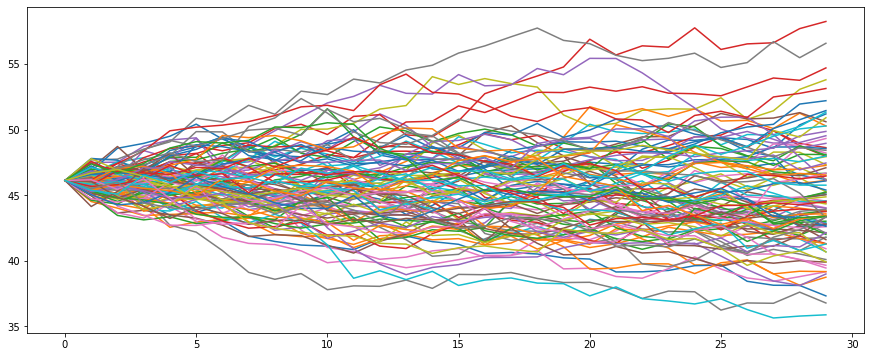

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_paths))
plt.show()

In [ ]:
# average profit or loss in Dollars
np.mean(price_paths[-1] - price_paths[0])

-1.0313985629131284

In [ ]:
# potential percentage profit after 30 days
np.mean(price_paths[-1] - price_paths[0]) * 100 / np.mean(price_paths[0])

-2.236336918473078

In [ ]:
# We will decide to sell the stock if we have 1% loss after 30 days
# and buy the stock if we have 1% profit. Otherwise we will hold the share.
percnt = 0.01
if np.mean(price_paths[-1] - price_paths[0]) > percnt*np.mean(price_paths[0]) :
    print('Buy')
elif np.mean(price_paths[0] - price_paths[-1]) > percnt*np.mean(price_paths[0]) :
    print('Sell')
else:
    print('Hold')

Sell
